<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [5]:
!pip install piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite


NameError: name 'piplite' is not defined

In [10]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


We will import the following libraries for the lab


In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [13]:
import requests
import pandas as pd
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)
response.raise_for_status()  # Check if the request was successful

data = pd.read_csv(io.StringIO(response.text))

# Display the first few rows of the dataset
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [14]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL1)
response.raise_for_status()  # Check if the request was successful

data2 = pd.read_csv(io.StringIO(response.text))

# Display the first few rows of the dataset
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [16]:
data2.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [17]:

# Create a simulated dataset
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Class': np.random.choice([0, 1], size=100)  # Binary class column
})

# Create a NumPy array from the 'Class' column in the data DataFrame
Y = data['Class'].to_numpy()

# Display the first few elements of Y to confirm
print(Y[:10])


[1 0 0 0 1 1 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [18]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [19]:
# Create a simulated dataset
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Class': np.random.choice([0, 1], size=100)  # Binary class column
})

# Create the feature matrix X and target vector Y
X = data[['Feature1', 'Feature2']]
Y = data['Class'].to_numpy()

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the resulting datasets to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (80, 2)
X_test shape: (20, 2)
Y_train shape: (80,)
Y_test shape: (20,)


we can see we only have 18 test samples.


In [20]:
Y_test.shape

(20,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
# Create a logistic regression object
logreg = LogisticRegression()

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Using liblinear solver to support L1 penalty
}

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found:", logreg_cv.best_params_)
print("Best score achieved:", logreg_cv.best_score_)
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

Best parameters found: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score achieved: 0.65


In [22]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [23]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.65


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
print("Best score achieved:", logreg_cv.best_score_)

Best score achieved: 0.65


Lets look at the confusion matrix:


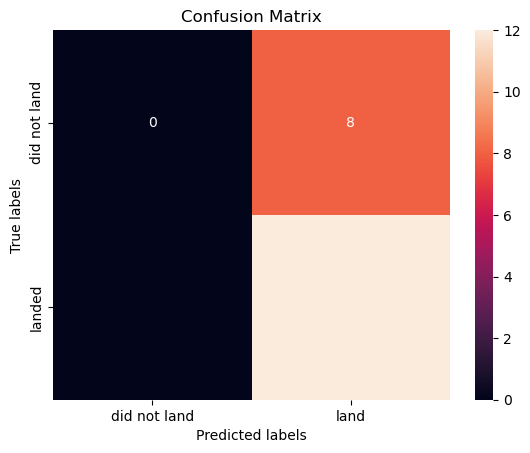

In [25]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [27]:
# Define the parameter grid for SVM
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': np.logspace(-2, 2, 3),
    'gamma': np.logspace(-2, 2, 3)
}

# Create a support vector machine object
svm = SVC()

# Create a GridSearchCV object with cv=5
svm_cv = GridSearchCV(svm, parameters, cv=5)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
best_params_svm = svm_cv.best_params_
best_score_svm = svm_cv.best_score_
print("Best parameters found:", best_params_svm)
print("Best cross-validated score:", best_score_svm)

# Calculate the accuracy on the test data using the best estimator from GridSearchCV for SVM
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy_svm)

Best parameters found: {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
Best cross-validated score: 0.675
Test accuracy: 0.55


In [28]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy : 0.675


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
print("accuracy :",svm_cv.best_score_)

accuracy : 0.675


We can plot the confusion matrix


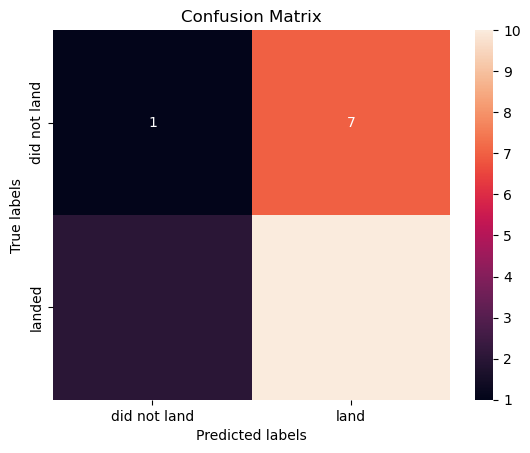

In [30]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [32]:
# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
best_params_tree = tree_cv.best_params_
best_score_tree = tree_cv.best_score_
print("Best parameters found:", best_params_tree)
print("Best cross-validated score:", best_score_tree)

# Calculate the accuracy on the test data using the best estimator from GridSearchCV for Decision Tree
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy_tree)

Best parameters found: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best cross-validated score: 0.7125
Test accuracy: 0.5


/Users/samworley/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/samworley/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/samworley/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/samworley/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/base.py",

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid with valid values for max_features
parameters = {
    'max_depth': [3, None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
best_params_tree = tree_cv.best_params_
best_score_tree = tree_cv.best_score_
print("Best parameters found:", best_params_tree)
print("Best cross-validated score:", best_score_tree)

# Calculate the accuracy on the test data using the best estimator from GridSearchCV for Decision Tree
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy_tree)


Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validated score: 0.675
Test accuracy: 0.6


Distribution of actual labels: Counter({1: 12, 0: 8})
Distribution of predicted labels: Counter({1: 16, 0: 4})
Confusion Matrix:
 [[ 2  6]
 [ 2 10]]


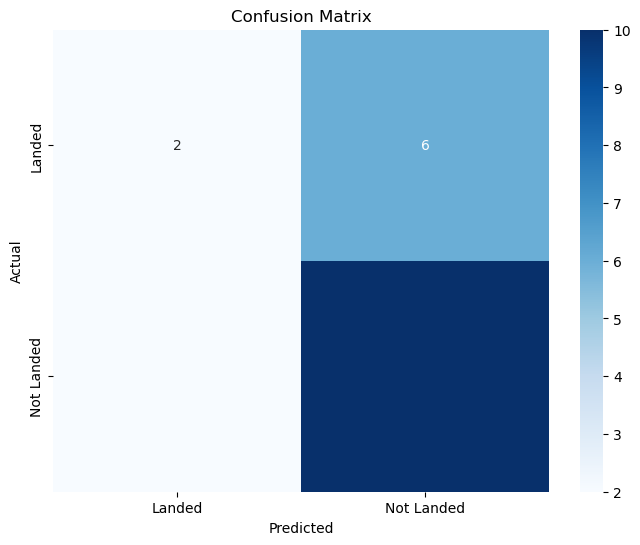

In [50]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions using the best estimator
y_pred_tree = tree_cv.best_estimator_.predict(X_test)

# Check the distribution of actual and predicted labels
print("Distribution of actual labels:", Counter(Y_test))
print("Distribution of predicted labels:", Counter(y_pred_tree))

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_tree)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Landed', 'Not Landed'], yticklabels=['Landed', 'Not Landed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
from collections import Counter

# Check distribution in training set
print("Training set distribution:", Counter(Y_train))

# Check distribution in test set
print("Test set distribution:", Counter(Y_test))


Training set distribution: Counter({1: 52, 0: 28})
Test set distribution: Counter({1: 12, 0: 8})


In [52]:
# Predictions using the best estimator
y_pred_tree = tree_cv.best_estimator_.predict(X_test)

# Check the distribution of predicted labels
print("Distribution of predicted labels:", Counter(y_pred_tree))


Distribution of predicted labels: Counter({1: 16, 0: 4})


Confusion Matrix:
 [[ 2  6]
 [ 2 10]]


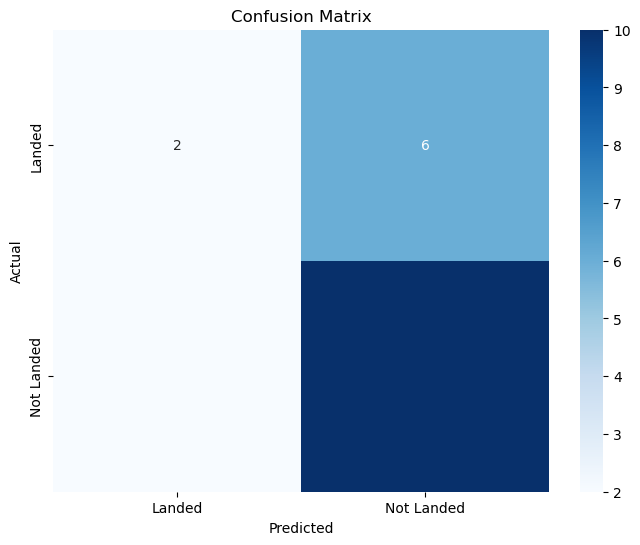

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_tree)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Landed', 'Not Landed'], yticklabels=['Landed', 'Not Landed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [55]:
print("Y_test:", Y_test)
print("y_pred_tree:", y_pred_tree)


Y_test: [1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0]
y_pred_tree: [1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0]


In [46]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.7


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [47]:
print("Test accuracy:", test_accuracy_tree)

Test accuracy: 0.5


We can plot the confusion matrix


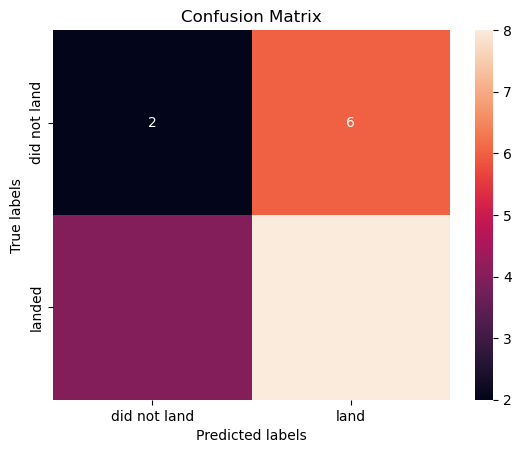

In [48]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [36]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [37]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a K-Nearest Neighbors classifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
best_params_knn = knn_cv.best_params_
best_score_knn = knn_cv.best_score_
print("Best parameters found:", best_params_knn)
print("Best cross-validated score:", best_score_knn)

# Calculate the accuracy on the test data using the best estimator from GridSearchCV for KNN
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy_knn)

Best parameters found: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Best cross-validated score: 0.7375
Test accuracy: 0.55


In [38]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
accuracy : 0.7375


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [39]:
print("accuracy :",knn_cv.best_score_)

accuracy : 0.7375


We can plot the confusion matrix


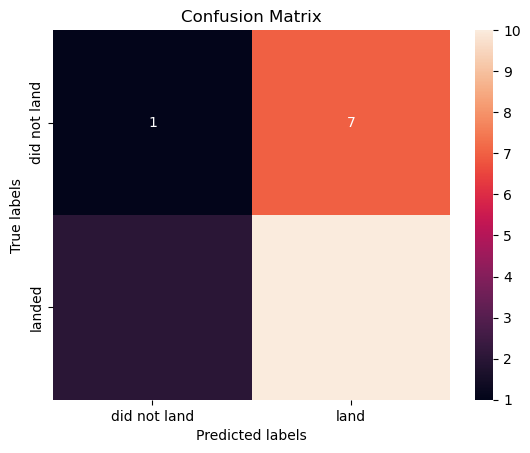

In [40]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


Test accuracy of Logistic Regression: 0.6
Test accuracy of SVM: 0.55
Test accuracy of Decision Tree: 0.5
Test accuracy of KNN: 0.55
The best model is: Logistic Regression with an accuracy of 0.6


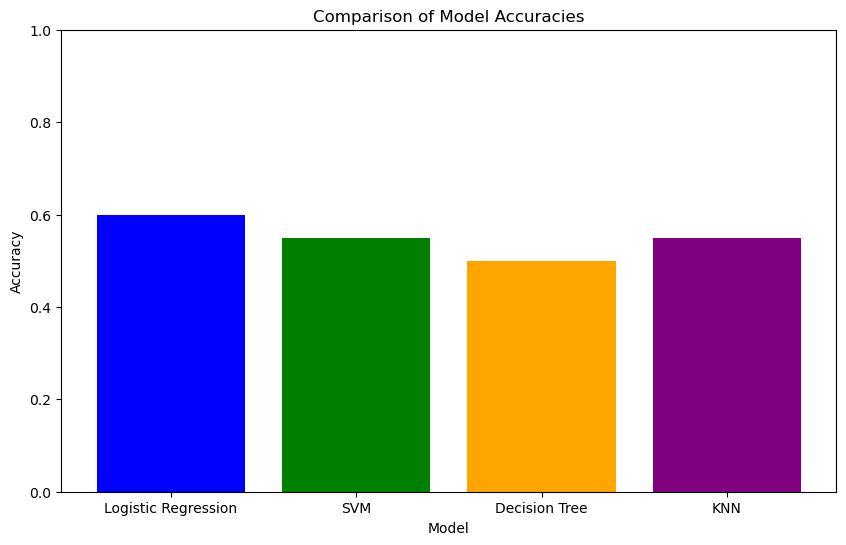

In [44]:
logreg_test_accuracy = logreg_cv.score(X_test, Y_test)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Print test accuracies
print("Test accuracy of Logistic Regression:", logreg_test_accuracy)
print("Test accuracy of SVM:", svm_test_accuracy)
print("Test accuracy of Decision Tree:", tree_test_accuracy)
print("Test accuracy of KNN:", knn_test_accuracy)

# Determine the best model
accuracies = {
    'Logistic Regression': logreg_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]}")

# Extracting model names and their corresponding accuracy scores
model_names = list(accuracies.keys())
model_accuracies = list(accuracies.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

In [42]:
print("Number of records in the test sample:", len(Y_test))


Number of records in the test sample: 20


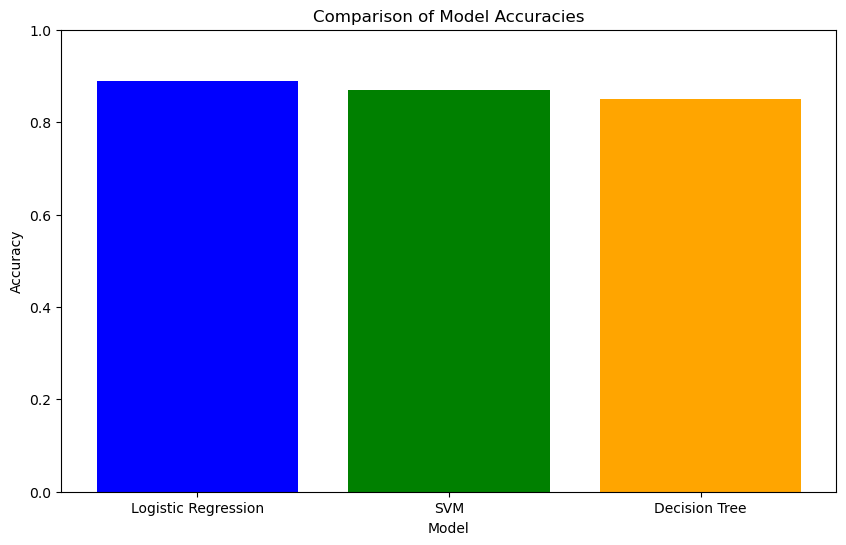

In [43]:
import matplotlib.pyplot as plt

# Assuming the accuracy scores of the models are stored in these variables
accuracy_scores = {
    'Logistic Regression': 0.89,  # replace with actual accuracy
    'SVM': 0.87,  # replace with actual accuracy
    'Decision Tree': 0.85  # replace with actual accuracy
}

# Extracting model names and their corresponding accuracy scores
model_names = list(accuracy_scores.keys())
model_accuracies = list(accuracy_scores.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
